# **Define of Model**

In [1]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import numpy as np

from sympy import symbols, Basic

def print_symbolic_expression(func):
    def wrapper(*args):
        # Perform original calculation
        result = func(*args)
        
        # Check if the last argument (x) is symbolic and print the symbolic expression
        if isinstance(args[-1], Basic):  # Check if x is a SymPy symbolic type
            symbolic_result = func(*args)
            print("Symbolic Expression with x as symbolic: \n", symbolic_result)
        
        return result  # Return the original numerical result
    return wrapper

Unse the Property of Tunnel Diode

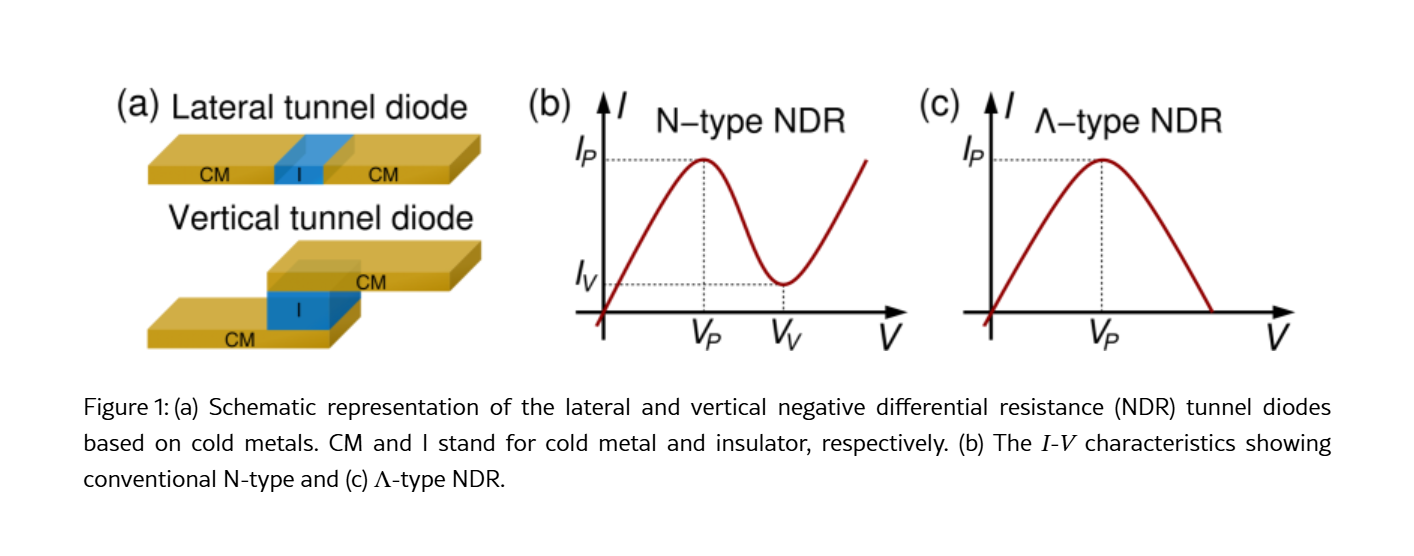 <!-- .element: width="300" -->

when implementing, we have to use real Tunnel Diodes as different basis

So we choose different types of diode and combine them together



In [14]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

def poly_td_arm(x):
    # 21A
    #return -262.192 * x ** 10 + 1799.212 * x ** 9 + -5124.896 * x ** 8 + 7772.620 * x ** 7 + -6625.441 * x ** 6 + 2972.293 * x ** 5 + -457.249 * x ** 4 + -110.617 * x ** 3 + 35.479 * x ** 2 + 0.784 * x ** 1  + 0.0086
    # 30A
    return 19.559 * x ** 10 + -301.035 * x ** 9 + 1609.68 * x ** 8 + -4368.632 * x ** 7 + 6855.784 * x ** 6 + -6502.273 * x ** 5 + 3692.262 * x ** 4 + -1167.609 * x ** 3 + 164.912 * x ** 2 + -2.695 * x ** 1  + 0.0394
def poly_td_zig(x):
    # 21A
    # -10897.441 * x ** 12 + 77250.191 * x ** 11 + -238401.39 * x ** 10 + 420611.281 * x ** 9 + -468566.875 * x ** 8 + 343629.937 * x ** 7 + -167793.125 * x ** 6 + 53901.078 * x ** 5 + -10970.352 * x ** 4 + 1317.378 * x ** 3 + -83.78 * x ** 2 + 3.81 * x ** 1  + -0.00457
    # 30A
    return 20801.033 * x ** 15 + -249977.562 * x ** 14 + 1341343.375 * x ** 13 + -4246726.0 * x ** 12 +  8829460.0 * x ** 11 + -12693978.0 * x ** 10 + 12940949 * x ** 9 + -9438600 * x ** 8 + 4908035.5 * x ** 7 + -1792129.875 * x ** 6 + 446487.468 * x ** 5 + -72365.734 * x ** 4 + 7053.805 * x ** 3 + -359.74 * x ** 2 + 7.569 * x ** 1  + -0.00815




#print(V_zig)
#print(I_zig)

x = symbols('x')
#coeffs_arm = np.polyfit(V_arm, I_arm, deg=10)  # 十阶多项式拟合
#poly_func_arm = np.poly1d(coeffs_arm)
coeffs_arm = torch.tensor([-262.192, 1799.212, -5124.896, 7772.620, -6625.441, 2972.293, -457.249, -110.617, 35.479, 0.784, 0.0086], dtype=torch.float32)

#Tunnel_diode_arm = torch.sum(coeffs_arm * x_powers, dim=-1)
Tunnel_diode_arm = coeffs_arm[0] * x ** 10 + coeffs_arm[1] * x ** 9 + coeffs_arm[2] * x ** 8 + coeffs_arm[3] * x ** 7 + coeffs_arm[4] * x ** 6 + coeffs_arm[5] * x ** 5 + coeffs_arm[6] * x ** 4 + coeffs_arm[7] * x ** 3 + coeffs_arm[8] * x ** 2 + coeffs_arm[9] * x ** 1  + coeffs_arm[10]

print(type(coeffs_arm))

#coeffs_zig = np.polyfit(V_zig, I_zig, deg=12)  # 十阶多项式拟合
#poly_func_zig = np.poly1d(coeffs_zig)  # 生成多项式函数
coeffs_zig = torch.tensor([-10897.441, 77250.172, -238401.39, 420611.281, -468566.875, 343629.937, -167793.125, 53901.078, -10970.352, 1317.377, -83.78, 3.81, 0.0045], dtype=torch.float32)
Tunnel_diode_zig = coeffs_zig[0] * x ** 12 + coeffs_zig[1] * x ** 11 + coeffs_zig[2] * x ** 10 + coeffs_zig[3] * x ** 9 + coeffs_zig[4] * x ** 8 + coeffs_zig[5] * x ** 7 + coeffs_zig[6] * x ** 6 + coeffs_zig[7] * x ** 5 + coeffs_zig[8] * x ** 4 + coeffs_zig[9] * x ** 3  + coeffs_zig[10] * x **2 + coeffs_zig[11] * x **1 + coeffs_zig[12]
print(Tunnel_diode_zig)

# 画出拟合曲线
print(coeffs_arm)
print(Tunnel_diode_arm)


<class 'torch.Tensor'>
-10897.44140625*x**12 + 77250.171875*x**11 - 238401.390625*x**10 + 420611.28125*x**9 - 468566.875*x**8 + 343629.9375*x**7 - 167793.125*x**6 + 53901.078125*x**5 - 10970.3515625*x**4 + 1317.376953125*x**3 - 83.7799987792969*x**2 + 3.80999994277954*x + 0.0044999998062849
tensor([-2.6219e+02,  1.7992e+03, -5.1249e+03,  7.7726e+03, -6.6254e+03,
         2.9723e+03, -4.5725e+02, -1.1062e+02,  3.5479e+01,  7.8400e-01,
         8.6000e-03])
-262.191986083984*x**10 + 1799.21203613281*x**9 - 5124.89599609375*x**8 + 7772.6201171875*x**7 - 6625.44091796875*x**6 + 2972.29296875*x**5 - 457.248992919922*x**4 - 110.616996765137*x**3 + 35.4790000915527*x**2 + 0.783999979496002*x + 0.00860000029206276


In [15]:
# %pip install torchsummary

class TDiode_KANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree):
        super(TDiode_KANLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.degree = degree

        self.gottlieb_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree))
        nn.init.normal_(self.gottlieb_coeffs, mean=0.0, std=1 / (input_dim * (degree)))

    def forward(self, x):
        # Rescale the input into the range of [0, 2.5]
        # x = 2.5 * (x - x.min()) / (x.max() - x.min())
        x = 1 * torch.sigmoid(x)
        #print(x)

        # Compute the Gottlieb basis functions
        TD_basis = []

        #for n in range(self.degree):
        #    TD_basis.append(TDiode_basis_GaAs(n, x))
        TD_basis.append(poly_td_arm(x))
        TD_basis.append(poly_td_zig(x))
        TD_basis = torch.stack(TD_basis, dim=-1)  # shape = (batch_size, input_dim, degree )
        #print(TD_basis,"bb")

        # Compute the Tunnel_Diode interpolation
        y = torch.einsum("bid,iod->bo", TD_basis, self.gottlieb_coeffs)  # shape = (batch_size, output_dim)
        y = y.view(-1, self.output_dim)
        #print(y)

        return y

# define a global constant for the input dimension
PIC_DIM = 100
INPUT_DIM = PIC_DIM * PIC_DIM
HIDDEN_DIM = 512
HIDDEN_DIM2 = 128
HIDDEN_DIM3 = 32
Tunnel_order = 2 #应该与层数有关，但是TD只有两层，如何增加层数？

class MNIST_TD_KAN(nn.Module):
    def __init__(self):
        super(MNIST_TD_KAN, self).__init__()
        self.trigkan1 = TDiode_KANLayer(INPUT_DIM, HIDDEN_DIM, Tunnel_order)
        self.bn1 = nn.LayerNorm(HIDDEN_DIM)
        self.trigkan2 = TDiode_KANLayer(HIDDEN_DIM, HIDDEN_DIM2, Tunnel_order)
        self.bn2 = nn.LayerNorm(HIDDEN_DIM2)
        self.trigkan3 = TDiode_KANLayer(HIDDEN_DIM2, HIDDEN_DIM3, Tunnel_order)
        self.bn3 = nn.LayerNorm(HIDDEN_DIM3)
        self.trigkan4 = TDiode_KANLayer(HIDDEN_DIM3, 10, Tunnel_order)

    def forward(self, x):
        x = x.view(-1, PIC_DIM*PIC_DIM)
        #x=x.sinh()
        x = self.trigkan1(x)
        x = self.bn1(x)
        x = self.trigkan2(x)
        x = self.bn2(x)
        x = self.trigkan3(x)
        x = self.bn3(x)
        x = self.trigkan4(x)
        return x

# plot the detailed structure of the model
model = MNIST_TD_KAN()
print(model)


MNIST_TD_KAN(
  (trigkan1): TDiode_KANLayer()
  (bn1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (trigkan2): TDiode_KANLayer()
  (bn2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (trigkan3): TDiode_KANLayer()
  (bn3): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (trigkan4): TDiode_KANLayer()
)


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Lambda()
           )


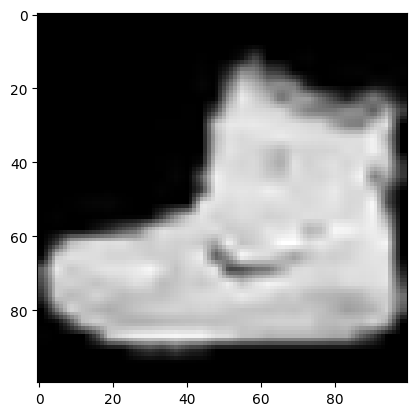

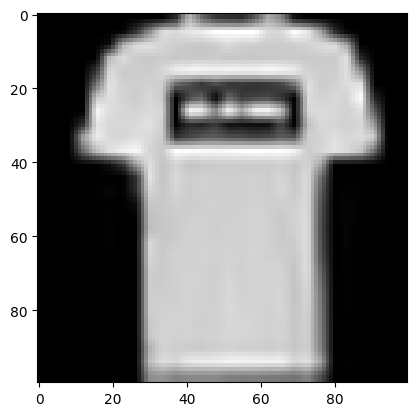

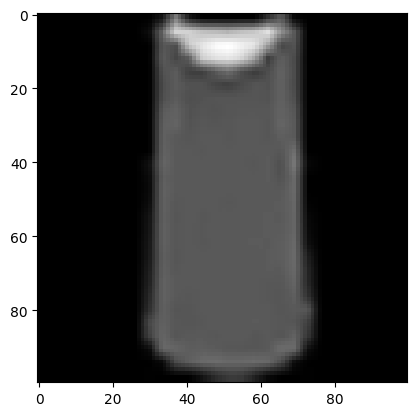

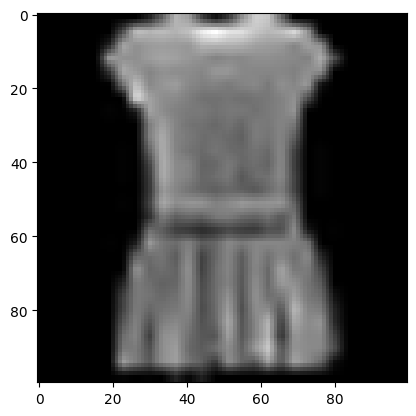

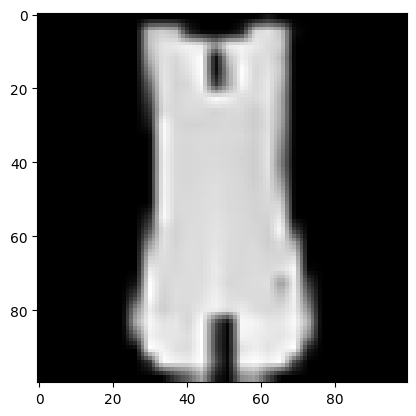

cuda


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

transform = transforms.Compose([
    transforms.Resize((PIC_DIM, PIC_DIM)),
    transforms.ToTensor(), 
    # Normalized the pixel values to be in the range [0, 2.5]
    transforms.Lambda(lambda x: x * 2.5),
    # Normalize the pixel values to have a mean of 0.1307 and a std of 0.308
    # transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# print the structure of used dataset
print(train_dataset)

# print some sample picutres of the resized dataset
for i in range(5):
    plt.figure()
    plt.imshow(train_dataset[i][0].squeeze().numpy(), cmap='gray')
    plt.show()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# plot which device is used
print(device)
num_classes = 10

criterion = nn.CrossEntropyLoss()

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    
    for idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        if isinstance(optimizer, optim.LBFGS):
            def closure():
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                return loss
            loss = optimizer.step(closure)
        else:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss = loss.item()
            
        total_loss += loss
        
    return total_loss / len(train_loader)

def validate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    return total_loss / len(test_loader), correct / len(test_loader.dataset)

In [17]:
Model_Names=['Tunnel_diode'] # Add names of other models
model0 = MNIST_TD_KAN().to(device)
models=[model0] # Add more models
total_params = sum(p.numel() for p in model0.parameters() if p.requires_grad)
print(f"Total trainable parameters of {Model_Names[0]}: {total_params}")


Total trainable parameters of Tunnel_diode: 10381248


# **Training of Model**

Tunnel_diode, Epoch 1, Train Loss: 1.6997, Test Loss: 1.2351, Test Acc: 0.54
Tunnel_diode, Epoch 2, Train Loss: 0.9513, Test Loss: 0.7482, Test Acc: 0.77
Tunnel_diode, Epoch 3, Train Loss: 0.6354, Test Loss: 0.5756, Test Acc: 0.80
Tunnel_diode, Epoch 4, Train Loss: 0.5150, Test Loss: 0.5328, Test Acc: 0.82
Tunnel_diode, Epoch 5, Train Loss: 0.4615, Test Loss: 0.4912, Test Acc: 0.83
Tunnel_diode, Epoch 6, Train Loss: 0.4308, Test Loss: 0.5094, Test Acc: 0.81
Tunnel_diode, Epoch 7, Train Loss: 0.4033, Test Loss: 0.4393, Test Acc: 0.84
Tunnel_diode, Epoch 8, Train Loss: 0.3899, Test Loss: 0.4186, Test Acc: 0.85
Tunnel_diode, Epoch 9, Train Loss: 0.3754, Test Loss: 0.3992, Test Acc: 0.86
Tunnel_diode, Epoch 10, Train Loss: 0.3635, Test Loss: 0.3887, Test Acc: 0.86
Tunnel_diode, Epoch 11, Train Loss: 0.3503, Test Loss: 0.4393, Test Acc: 0.84
Tunnel_diode, Epoch 12, Train Loss: 0.3443, Test Loss: 0.4042, Test Acc: 0.85
Tunnel_diode, Epoch 13, Train Loss: 0.3318, Test Loss: 0.3895, Test Acc: 

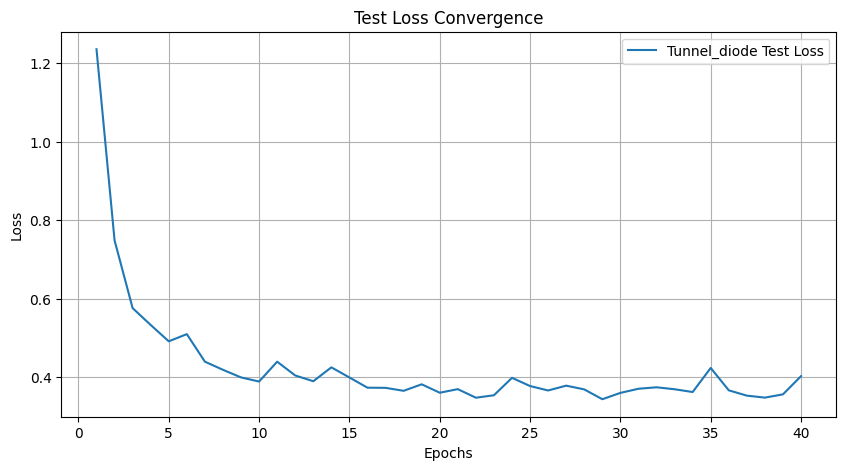

Tunnel_diode processing time: 1958.19 seconds


In [18]:
import time

epochs = 40

def train_and_validate(models, model_names, train_loader, test_loader, criterion, optimizers, device, epochs):
    train_losses = [[] for _ in range(len(models))]
    test_losses = [[] for _ in range(len(models))]
    best_weights = [None] * len(models)
    best_test_losses = [float('inf')] * len(models)
    model_times = [0.0] * len(models)  # Initialize a list to store processing time for each model

    for epoch in range(epochs):
        for i, (model, optimizer) in enumerate(zip(models, optimizers)):
            start_time = time.time()  # Record the start time

            train_loss = train(model, train_loader, criterion, optimizer, device)
            test_loss, test_accuracy = validate(model, test_loader, criterion, device)

            end_time = time.time()  # Record the end time
            model_times[i] += end_time - start_time  # Accumulate the processing time for the current model

            train_losses[i].append(train_loss)
            test_losses[i].append(test_loss)

            if test_loss < best_test_losses[i]:
                best_test_losses[i] = test_loss
                best_weights[i] = model.state_dict()

            print(f'{model_names[i]}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}, '
                  f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}')

    return train_losses, test_losses, best_weights, model_times


optimizers = [optim.Adam(model.parameters(), lr=0.0002) for model in models]

train_losses, test_losses, best_weights, model_times = train_and_validate(models, Model_Names, train_loader, test_loader, criterion, optimizers, device, epochs)

plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(range(1, epochs + 1), test_losses[i], label=f'{Model_Names[i]} Test Loss')
plt.title('Test Loss Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best weights for each model
for i, model in enumerate(models):
    model.load_state_dict(best_weights[i])
    torch.save(model.state_dict(), f'{Model_Names[i]}_best_weights.pth')

# Print the processing time for each model
for i, model_name in enumerate(Model_Names):
    print(f"{model_name} processing time: {model_times[i]:.2f} seconds")

# **Model Test**

In [19]:
def predict(model, test_loader, device):
    model.eval()
    predictions = []
    test_labels=[]

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            test_labels.extend(target.cpu().numpy())
            predictions.extend(pred.cpu().numpy())
    return predictions,test_labels

from sklearn.metrics import f1_score, cohen_kappa_score, accuracy_score
metrics = {
    'Accuracy': [],
    'Kappa': [],
    'F1 Score': []
}

for i, model in enumerate(models):
    model.load_state_dict(best_weights[i])
    model.eval()

    test_preds,test_labels = predict(model, test_loader, device)
    f1 = f1_score(test_labels, test_preds, average='micro')
    kappa = cohen_kappa_score(test_labels, test_preds)
    overall_acc = accuracy_score(test_labels, test_preds)
    metrics['Accuracy'].append(overall_acc)
    metrics['Kappa'].append(kappa)
    metrics['F1 Score'].append(f1)
    
    print(f"Model {Model_Names[i]} - "
          f"Overall Accuracy: {overall_acc:.4f}, "
          f"Kappa: {kappa:.4f}, "
          f"F1 Score: {f1:.4f}")

Model Tunnel_diode - Overall Accuracy: 0.8673, Kappa: 0.8526, F1 Score: 0.8673


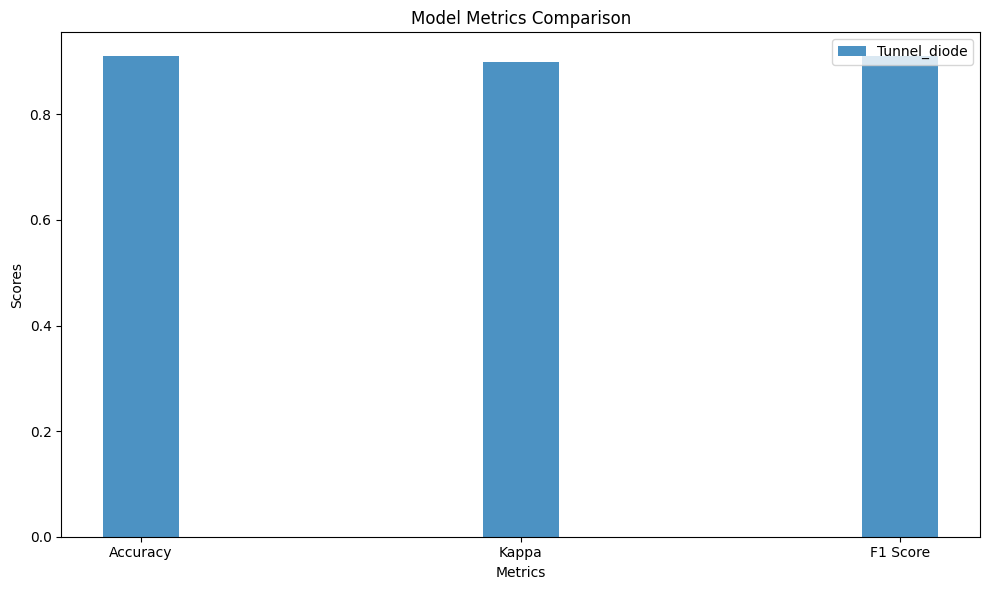

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
opacity = 0.8
index = np.arange(len(metrics.keys()))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom colors for each model

for i, model_name in enumerate(Model_Names):
    model_metrics = [metrics['Accuracy'][i], metrics['Kappa'][i], metrics['F1 Score'][i]]
    ax.bar(index + i * bar_width, model_metrics, bar_width,
           alpha=opacity, color=colors[i], label=model_name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Metrics Comparison')
ax.set_xticks(index + bar_width * (len(Model_Names) - 1) / 2)
ax.set_xticklabels(metrics.keys())
ax.legend()

plt.tight_layout()
plt.show()